In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

In [4]:
df = pd.read_csv("./world-happiness-report/2017.csv")
df.head(60)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


/Users/Taehee/bdf/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



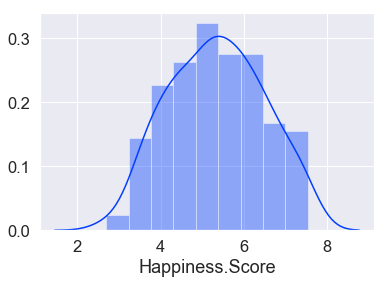

In [5]:
sns.distplot(df['Happiness.Score'])

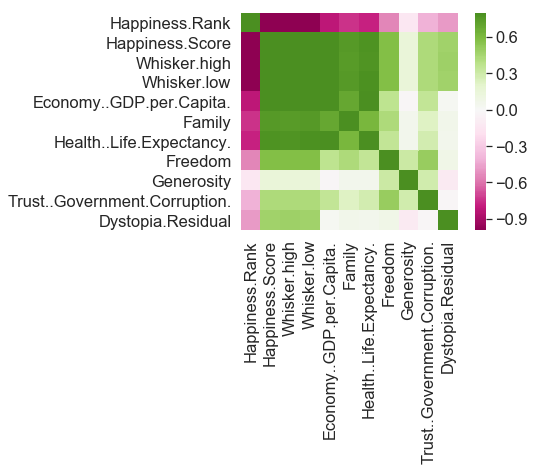

In [6]:
corrmat = df.corr()
sns.color_palette("Paired")
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0)

In [7]:
data = dict(type = 'choropleth', locations=df['Country'], locationmode='country names', z=df['Happiness.Rank'], 
            text=df['Country'],colorbar={'title':'Happiness'})
layout = dict(title = 'Global Happiness 2017', geo=dict(showframe = False))
choromap3 = go.Figure(data=[data], layout=layout)
iplot(choromap3)

In [8]:
y = df['Happiness.Score']
X = df.drop(['Happiness.Score', 'Happiness.Rank', 'Country', 'Whisker.high', 'Whisker.low'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [1.0000158  0.99988359 1.00010937 1.00007047 1.00010167 0.99977243
 0.99993477]


/Users/Taehee/bdf/lib/python3.5/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning:

internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.



In [10]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

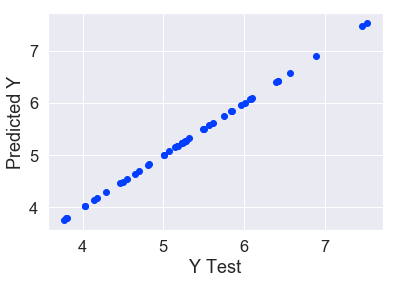

In [11]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [12]:
df_2015 = pd.read_csv("./world-happiness-report/2015.csv")
df_2017 = pd.read_csv("./world-happiness-report/2017.csv").drop(['Whisker.high', 'Whisker.low', 'Happiness.Rank'], axis=1)

df_2015 = df_2015[['Country', 'Region']]
df = pd.merge(df_2015, df_2017, on='Country')
df.head(5)

,Country,Region,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
1,Iceland,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
2,Denmark,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
3,Norway,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
4,Canada,North America,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264


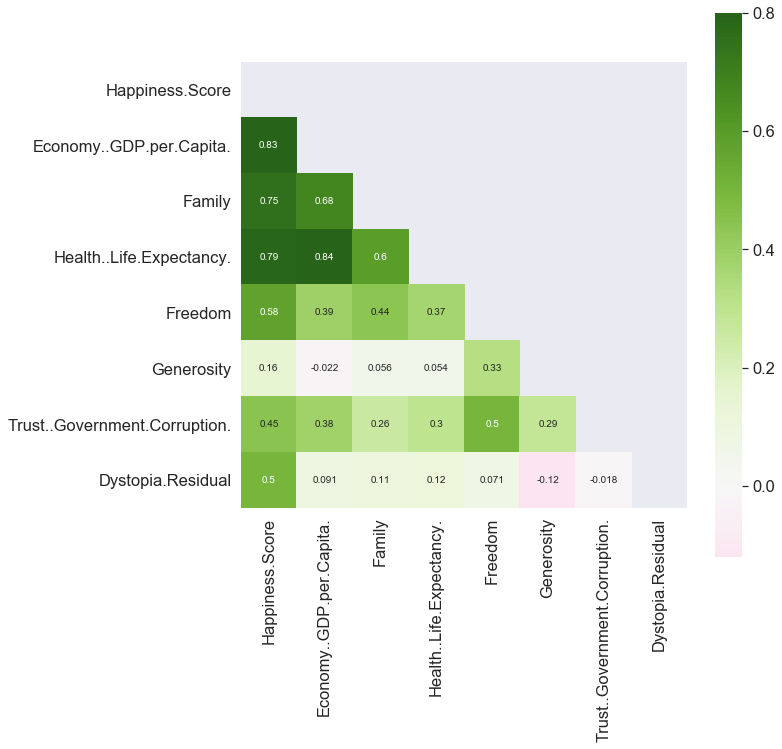

In [13]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

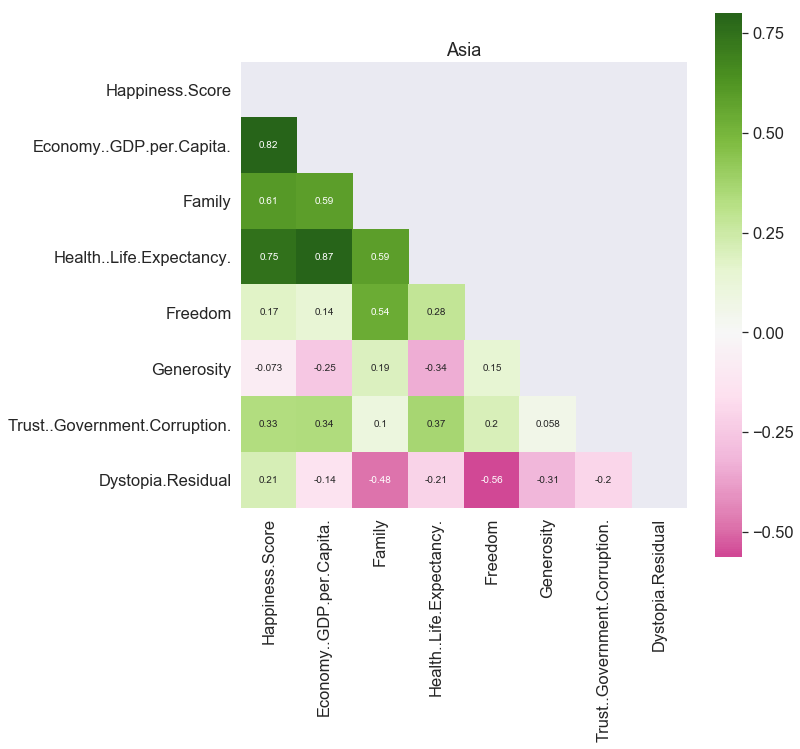

In [21]:
corrmat = df[df['Region'].str.contains('Asia')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Asia')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

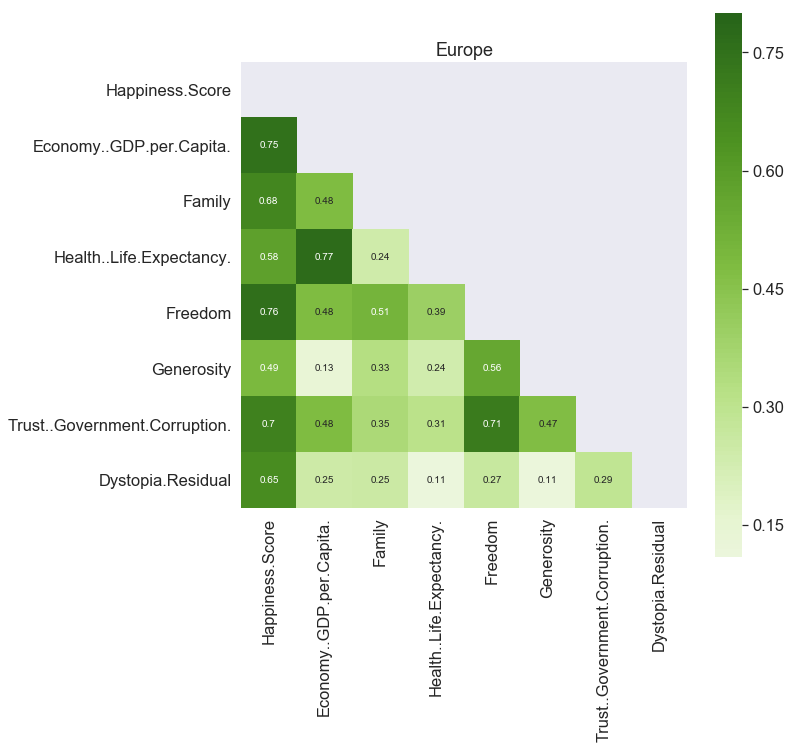

In [15]:
corrmat = df[df['Region'].str.contains('Europe')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Europe')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

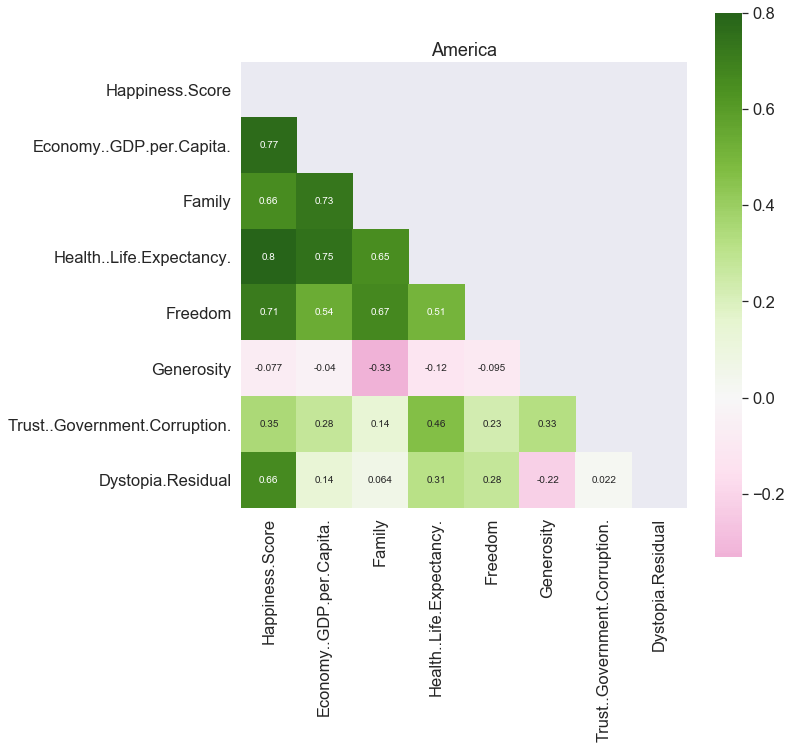

In [16]:
corrmat = df[df['Region'].str.contains('America')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('America')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

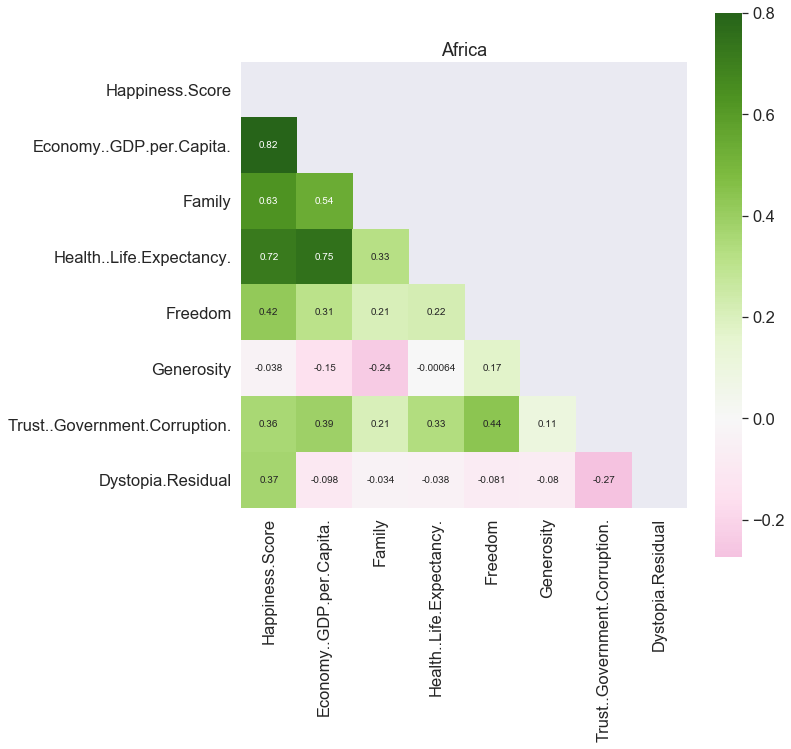

In [17]:
corrmat = df[df['Region'].str.contains('Africa')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Africa')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

In [18]:
kcj_df = df[df['Country'].str.contains('Korea|China|Japan')]
kcj_df

,Country,Region,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
42,Japan,Eastern Asia,5.920,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224
43,South Korea,Eastern Asia,5.838,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378
79,China,Eastern Asia,5.273,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939


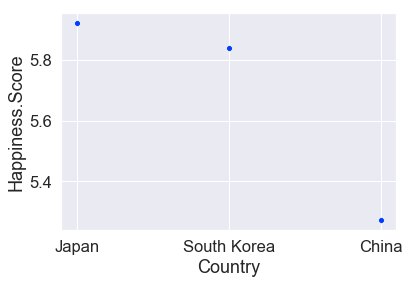

In [19]:
sns.scatterplot(x='Country', y='Happiness.Score', data=kcj_df)